# import the data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.svm import SVC, LinearSVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DATA_3105/ECON3015_PORJECT.xlsx')
data

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.139,0.010,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,2,0.000,1.000,0.000,0.000,0.000,0.000,0.143,0.010,1.17,0.108,0.663,0.650,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,3,0.000,0.000,1.000,0.000,0.000,0.000,0.173,0.018,1.30,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,4,0.000,0.000,0.000,1.000,0.000,0.000,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,5,0.000,0.000,0.000,0.000,1.000,0.000,0.096,0.001,1.04,0.087,0.725,0.538,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200,0.171,0.022,0.94,0.100,0.700,0.638,0.685397,0.706792,0.322843,0.329431,0.64,0.729412
59,60,0.200,0.200,0.000,0.200,0.200,0.200,0.153,0.018,0.88,0.087,0.725,0.638,0.595786,0.631599,0.259952,0.204156,0.72,0.729412
60,61,0.200,0.000,0.200,0.200,0.200,0.200,0.156,0.018,0.97,0.104,0.663,0.525,0.612546,0.631119,0.359730,0.368958,0.52,0.411765
61,62,0.000,0.200,0.200,0.200,0.200,0.200,0.161,0.018,0.98,0.094,0.688,0.663,0.635785,0.634402,0.362039,0.277221,0.60,0.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       63 non-null     int64  
 1    Large B/P                               63 non-null     float64
 2    Large ROE                               63 non-null     float64
 3    Large S/P                               63 non-null     float64
 4    Large Return Rate in the last quarter   63 non-null     float64
 5    Large Market Value                      63 non-null     float64
 6    Small systematic Risk                   63 non-null     float64
 7   Annual Return                            63 non-null     float64
 8   Excess Return                            63 non-null     float64
 9   Systematic Risk                          63 non-null     float64
 10  Total Risk                               63 non-null

In [ ]:
data['Total Risk.1']

0     0.800000
1     0.412231
2     0.756879
3     0.756046
4     0.209289
        ...   
58    0.329431
59    0.204156
60    0.368958
61    0.277221
62    0.284923
Name: Total Risk.1, Length: 63, dtype: float64

In [ ]:
data =  data.drop(data.columns[[0,7,8,9,10,11,12]], axis=1)
data

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.000,0.000,0.000,0.000,0.000,0.000,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.000,1.000,0.000,0.000,0.000,0.000,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.000,0.000,1.000,0.000,0.000,0.000,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.000,0.000,0.000,1.000,0.000,0.000,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.000,0.000,0.000,0.000,1.000,0.000,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.200,0.200,0.200,0.000,0.200,0.200,0.685397,0.706792,0.322843,0.329431,0.64,0.729412
59,0.200,0.200,0.000,0.200,0.200,0.200,0.595786,0.631599,0.259952,0.204156,0.72,0.729412
60,0.200,0.000,0.200,0.200,0.200,0.200,0.612546,0.631119,0.359730,0.368958,0.52,0.411765
61,0.000,0.200,0.200,0.200,0.200,0.200,0.635785,0.634402,0.362039,0.277221,0.60,0.800000


In [ ]:
data['Rel. Win Rate.1'].describe()

count    63.000000
mean      0.547899
std       0.159468
min       0.200000
25%       0.411765
50%       0.552941
75%       0.694118
max       0.800000
Name: Rel. Win Rate.1, dtype: float64

In [ ]:
data['Total Risk.1'].describe()

count    63.000000
mean      0.391749
std       0.136653
min       0.200000
25%       0.297324
50%       0.368958
75%       0.457749
max       0.800000
Name: Total Risk.1, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0    Large B/P                               63 non-null     float64
 1    Large ROE                               63 non-null     float64
 2    Large S/P                               63 non-null     float64
 3    Large Return Rate in the last quarter   63 non-null     float64
 4    Large Market Value                      63 non-null     float64
 5    Small systematic Risk                   63 non-null     float64
 6   Annual Return.1                          63 non-null     float64
 7   Excess Return.1                          63 non-null     float64
 8   Systematic Risk.1                        63 non-null     float64
 9   Total Risk.1                             63 non-null     float64
 10  Abs. Win Rate.1                          63 non-null

# Decision tree model


In [ ]:
#
X = data.iloc[:, 0:6]
y = data['Total Risk.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [ ]:
# Define the decision tree regressor model
model = DecisionTreeRegressor(random_state=100)

# Train the model using k-fold cross-validation to tune the hyperparameters
kf = KFold(n_splits=7, shuffle=True, random_state=100)


In [ ]:
# Define a function to compute the feature importance weights
def compute_feature_weights(model, feature_names):
    importances = model.feature_importances_
    weights = importances / importances.sum()
    feature_weights = pd.Series(weights, index=feature_names, name='Feature_weight')
    return feature_weights



In [ ]:
# Perform k-fold cross-validation to tune the hyperparameters
best_score = float('-inf')
for max_depth in range(1, 11):
    for min_samples_split in range(2, 11):
        for min_samples_leaf in range(1, 6):
            model.set_params(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            scores = []
for train_idx, val_idx in kf.split(X_train):
  X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
  X_val_fold, y_val_fold = X_train.iloc[val_idx], y_train.iloc[val_idx]
  model.fit(X_train_fold, y_train_fold)
  scores.append(model.score(X_val_fold, y_val_fold))



In [ ]:
# Compute the mean cross-validation score and update the best hyperparameters if necessary
mean_score = np.mean(scores)
if mean_score > best_score:
  best_score = mean_score
  best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [ ]:
best_params

{'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}

In [ ]:
model.set_params(**best_params)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=100)

In [ ]:
best_score

-0.017145788810368007

In [ ]:
test_score = model.score(X_test, y_test)

In [ ]:
feature_names = X_train.columns
feature_weights = compute_feature_weights(model, feature_names)

In [ ]:
normalized_weights = feature_weights / feature_weights.sum()

In [ ]:
print('Best hyperparameters:', best_params)
print('Cross-validation score:', best_score)
print('Test set score:', test_score)
print('Feature weights:')
print( feature_weights)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}
Cross-validation score: -0.017145788810368007
Test set score: 0.553327846916085
Feature weights:
 Large B/P                                 0.000000
 Large ROE                                 0.284832
 Large S/P                                 0.000000
 Large Return Rate in the last quarter     0.000000
 Large Market Value                        0.511058
 Small systematic Risk                     0.204110
Name: Feature_weight, dtype: float64


In [ ]:
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_weights[i]}")

 Large B/P : 0.0
 Large ROE : 0.28483169152060367
 Large S/P : 0.0
 Large Return Rate in the last quarter : 0.0
 Large Market Value : 0.5110581874187031
 Small systematic Risk: 0.2041101210606932


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error:', mse)
print('Coefficient of determination (R^2):', r2)

Mean squared error: 0.006732309841365995
Coefficient of determination (R^2): 0.553327846916085


## DT classification


In [ ]:
data['Total Risk.1'] = data['Total Risk.1'].apply(lambda x: "H" if x > 0.3689 else 'L')
data.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,H,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,H,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,H,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,H,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,L,0.72,0.447059


In [ ]:
data['Total Risk.1']

0     H
1     H
2     H
3     H
4     L
     ..
58    L
59    L
60    H
61    L
62    L
Name: Total Risk.1, Length: 63, dtype: object

In [ ]:
data['Total Risk.1'].value_counts()

H    32
L    31
Name: Total Risk.1, dtype: int64

In [ ]:
X2 = data.iloc[:, 0:6]
y2 = data['Total Risk.1']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#apply the grid research using K-fold validation 

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=100)

# Define the hyperparameters to tune
params = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_model, params, cv=7)
grid_search.fit(X2_train, y2_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score for DT: ", grid_search.best_score_)

Best hyperparameters: {'max_depth': 2, 'min_samples_split': 2}
Best score for DT:  0.7333333333333334


In [ ]:
best_params = grid_search.best_params_

In [ ]:
from sklearn.metrics import accuracy_score,  classification_report

In [ ]:
# Train decision tree classifier on entire dataset using best parameters
clf = DecisionTreeClassifier(random_state=100, **best_params)
# clf = DecisionTreeClassifier(random_state=100, max_depth = 3)
clf.fit(X2_train, y2_train)

# Predict classes for testing set
y2_pred_dt2 = clf.predict(X_test)


In [ ]:
from sklearn.model_selection import cross_val_score
clf_cv = cross_val_score(estimator = clf, X = X2, y = y2, cv=7)   # entire data
display(clf_cv, clf_cv.mean(), clf_cv.std())  

array([0.66666667, 0.88888889, 0.66666667, 0.66666667, 0.77777778,
       0.88888889, 0.77777778])

0.7619047619047619

0.09255479198167144

In [ ]:
accuracy = accuracy_score(y2_test, y2_pred_dt2)
report = classification_report(y2_test, y2_pred_dt2)
print("Accuracy:", accuracy)
print("Classification Report:", report)

Accuracy: 0.6153846153846154
Classification Report:               precision    recall  f1-score   support

           H       0.62      0.71      0.67        14
           L       0.60      0.50      0.55        12

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.61      0.62      0.61        26



In [ ]:
display(clf.feature_importances_, X2_train.columns)

array([0.        , 0.        , 0.13999667, 0.15606129, 0.70394204,
       0.        ])

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')

In [ ]:
# normalized_weights = clf.feature_importances_ / clf.feature_importances_.sum()

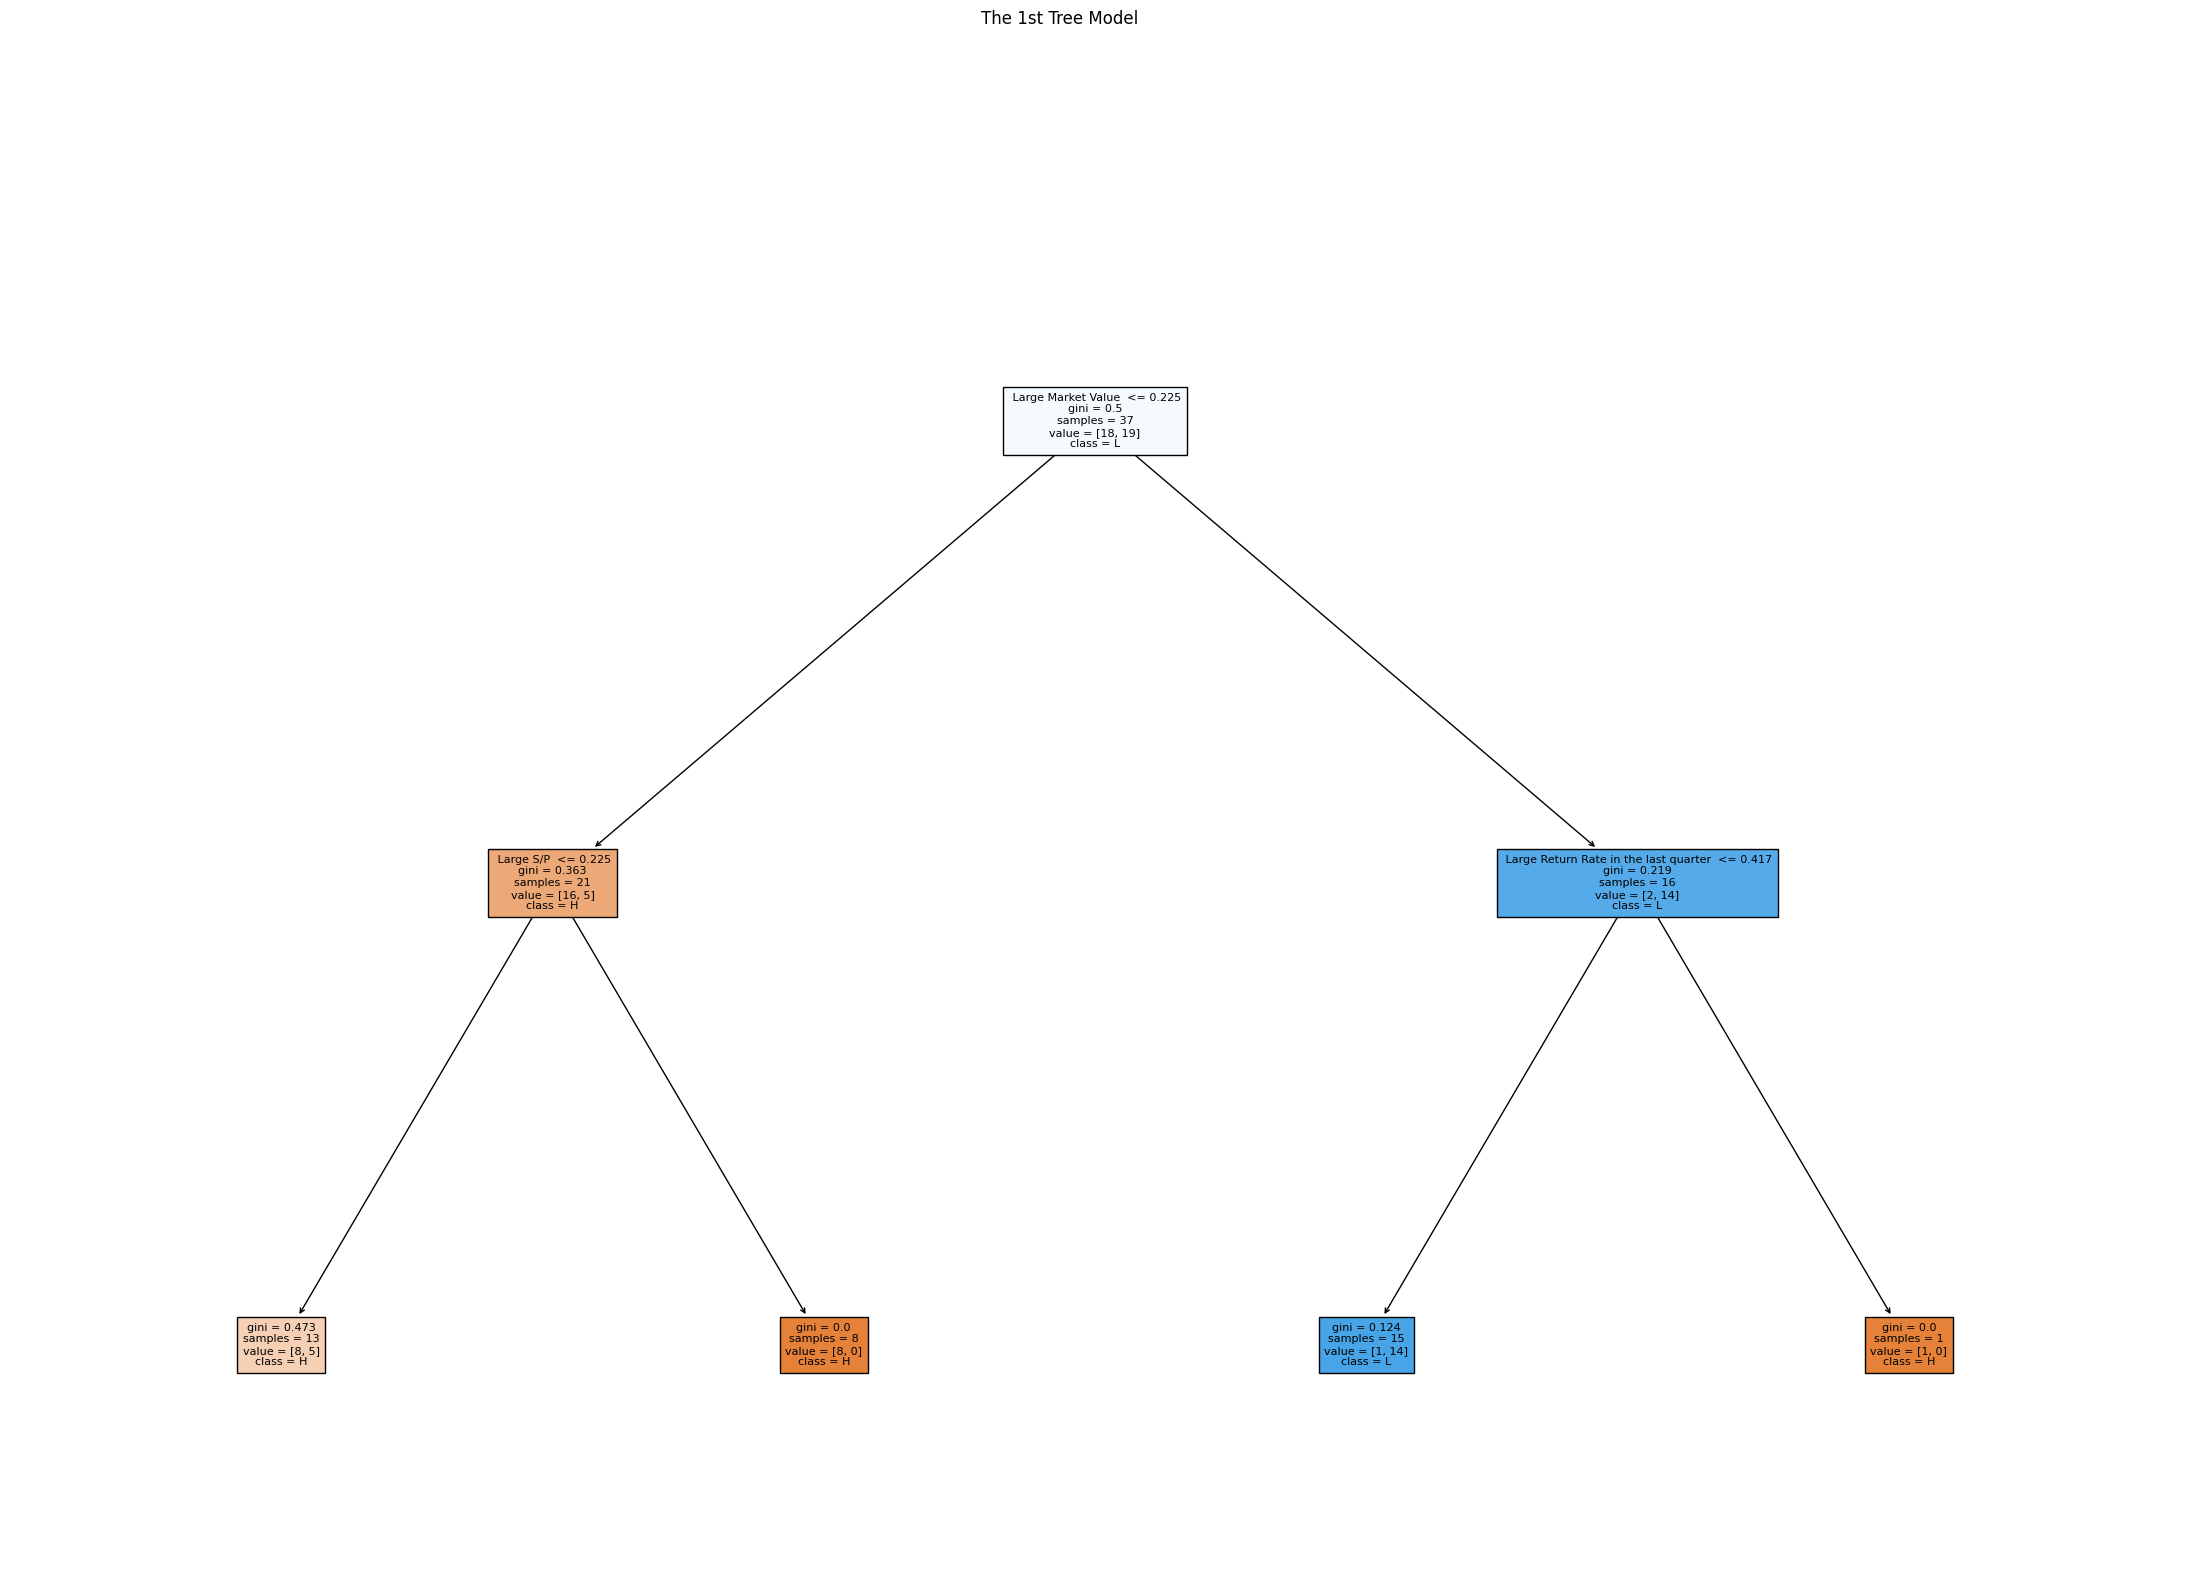

In [ ]:
fig = plt.figure(figsize=(28,18))    

tree.plot_tree(clf, 
               feature_names = X2_train.columns.to_list(),  # Feature name
               class_names = ['H','L'],             # Target value names in ascending numerical order.
               filled = True,                              # if True, paint nodes to indicate majority class  
               fontsize = 8);   

fig.suptitle('The 1st Tree Model'); 

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import confusion_matrix


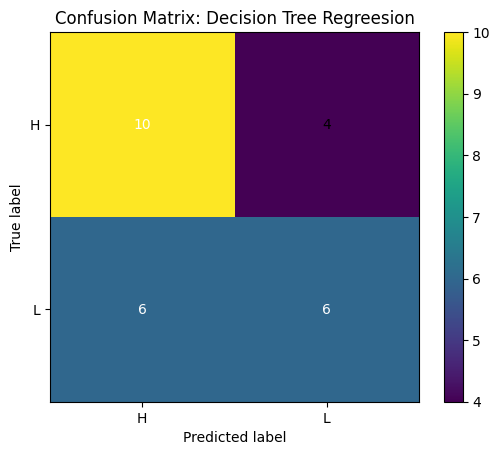

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true = y2_test, 
                      y_pred = y2_pred_dt2, 
                      cmap = 'viridis',    # Choose a prefered color map
                      title = 'Confusion Matrix: Decision Tree Regreesion'); 

In [ ]:
tn1, fp1, fn1, tp1 = confusion_matrix(y2_test, y2_pred_dt2).ravel()
print('\nConfusion Matrix:')
print('TN=',tn1, 'FP=', fp1, 'FN=', fn1, 'TP=', tp1)
print('Recall/Sensitivity= ',round(tp1/(tp1+fn1),3))
print('Specificity= ', round(tn1/(tn1+fp1),3))
print('Precision= ', round(tp1/(tp1+fp1),3))


Confusion Matrix:
TN= 10 FP= 4 FN= 6 TP= 6
Recall/Sensitivity=  0.5
Specificity=  0.714
Precision=  0.6


In [ ]:
dt_prob = clf.predict_proba(X2_test)

dt_prob 

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.06666667, 0.93333333],
       [0.06666667, 0.93333333],
       [0.06666667, 0.93333333],
       [0.06666667, 0.93333333],
       [1.        , 0.        ],
       [0.61538462, 0.38461538],
       [1.        , 0.        ],
       [0.61538462, 0.38461538],
       [0.61538462, 0.38461538],
       [1.        , 0.        ],
       [0.61538462, 0.38461538],
       [0.61538462, 0.38461538],
       [0.06666667, 0.93333333],
       [0.06666667, 0.93333333],
       [1.        , 0.        ],
       [0.61538462, 0.38461538],
       [0.06666667, 0.93333333],
       [0.06666667, 0.93333333],
       [0.61538462, 0.38461538],
       [0.06666667, 0.93333333],
       [0.06666667, 0.93333333],
       [0.61538462, 0.38461538],
       [1.        , 0.        ],
       [0.61538462, 0.38461538]])

In [ ]:
from sklearn.metrics import roc_curve 
 
fpr_dt, tpr_dt, thresholds = roc_curve(y_true = y2_test, 
                                       y_score = dt_prob[:,0], 
                                       pos_label = 'H')    # col 1 refers to "LEAVE"

display(fpr_dt, tpr_dt, thresholds)     # thresholds:  f(x) values

array([0. , 0. , 0.5, 1. ])

array([0.        , 0.5       , 0.71428571, 1.        ])

array([2.        , 1.        , 0.61538462, 0.06666667])

In [ ]:
from sklearn.metrics import auc
 
auc_dt = auc(x = fpr_dt, y = tpr_dt)

auc_dt

0.7321428571428572

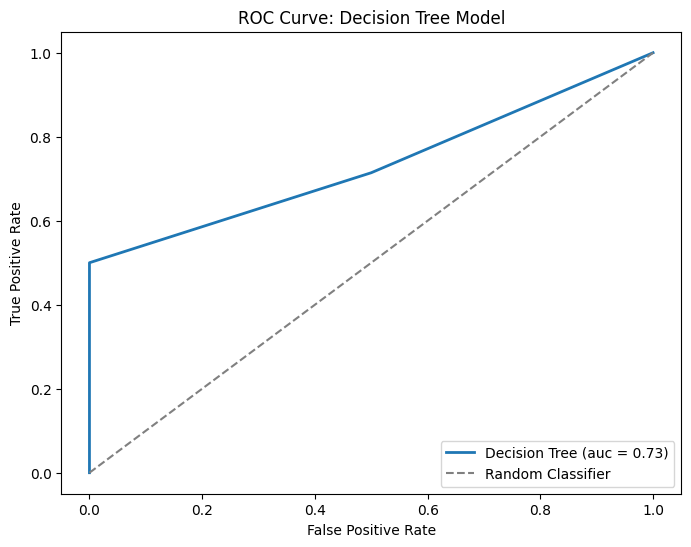

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_dt, tpr_dt, lw= 2, label='Decision Tree (auc = {:0.2f})'.format(auc_dt))    # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve: Decision Tree Model', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 

# Ridge regression


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:


# Perform Min-Max scaling on the feature data
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_scaled = scaler.fit_transform(X)

In [ ]:
y_train

46    0.412004
17    0.343837
7     0.797195
60    0.368958
45    0.315369
38    0.215255
37    0.339495
19    0.537185
13    0.217769
1     0.412231
31    0.276483
4     0.209289
27    0.267301
51    0.415340
22    0.354656
29    0.337104
9     0.459788
16    0.415913
43    0.263473
36    0.464378
57    0.379353
61    0.277221
50    0.200000
14    0.363999
53    0.245546
2     0.756879
34    0.338782
52    0.258485
30    0.335213
10    0.473208
48    0.492406
15    0.415240
23    0.561711
39    0.334081
3     0.756046
24    0.414118
8     0.418338
Name: Total Risk.1, dtype: float64

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Ridge regression model
ridge = Ridge()

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=7)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the model on training data

# Get the best alpha and its corresponding score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best alpha:", best_alpha)
print("Best score:", best_score)

Best alpha: 1
Best score: 0.24282874023185355


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Instantiate the Ridge regression model
alpha = 0.1 
ridge_model = Ridge(alpha=alpha)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Get the coefficients (weights) of the features
feature_weights = ridge_model.coef_

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(ridge_model, X, y, cv=7)  # Use 7-fold cross-validation
mean_cv_score = np.mean(cv_scores)

# Print the feature weights and cross-validation score
print("Feature Weights: ")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_weights[i]}")
print(f"Mean Cross-Validation Score: {mean_cv_score}")

Feature Weights: 
 Large B/P : 0.052624346204477375
 Large ROE : -0.11663459545817514
 Large S/P : 0.2644208392757901
 Large Return Rate in the last quarter : 0.1955772088593704
 Large Market Value : -0.27596012553754196
 Small systematic Risk: -0.11536920277585344
Mean Cross-Validation Score: -0.1320939467554945


In [ ]:
weights = ridge_model.coef_


In [ ]:
# Normalize the weights to add up to 1
weights_normalized = weights / np.sum(weights)

print("weights:", weights)

weights: [ 0.05262435 -0.1166346   0.26442084  0.19557721 -0.27596013 -0.1153692 ]


In [ ]:
cv_scores = -cv_scores
mse_mean = np.mean(cv_scores) # mean of MSE scores
mse_std = np.std(cv_scores) # standard deviation of MSE scores

# Calculate R-squared scores
r2_scores = cross_val_score(ridge, X, y, cv=7, scoring='r2') # R-squared scores
r2_mean = np.mean(r2_scores) # mean of R-squared scores
r2_std = np.std(r2_scores) # standard deviation of R-squared scores

# Print the MSE and R-squared scores
print("Mean MSE:", mse_mean)
print("Standard deviation of MSE:", mse_std)
print("Mean R-squared:", r2_mean)
print("Standard deviation of R-squared:", r2_std)

Mean MSE: 0.1320939467554945
Standard deviation of MSE: 0.8574153717461281
Mean R-squared: -0.12377265159732545
Standard deviation of R-squared: 0.9332452693964522


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Compute the mean squared error and R^2 score
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the results
print('Mean squared error:', mse_ridge)
print('Coefficient of determination (R^2):', r2_ridge)

Mean squared error: 0.010997113814288409
Coefficient of determination (R^2): 0.2703686222290096


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform grid search with 5-fold cross-validation
grid_search_logi = GridSearchCV(logreg, param_grid, cv=7)

# Fit the grid search to the data
grid_search_logi.fit(X2_train, y2_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters for logistic: ", grid_search_logi.best_params_)
print("Best score for logistic: ", grid_search_logi.best_score_)

Best hyperparameters for logistic:  {'C': 1, 'penalty': 'l2'}
Best score for logistic:  0.7857142857142856


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

In [ ]:
logi = LogisticRegression(penalty='l2', C = 1)

logi_cv = cross_val_score(estimator = logi,X = X2, y = y2, cv=7)   # entire data

display(logi_cv, logi_cv.mean(), logi_cv.std())

array([0.77777778, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.88888889, 0.77777778])

0.7301587301587301

0.08093681767607595

In [ ]:
logi = LogisticRegression(penalty='l2', C = 1).fit(X2_train, y2_train)   # fit the model

display(logi.intercept_, logi.coef_, logi.feature_names_in_) 

array([0.06305437])

array([[-0.32031195,  0.24448044, -0.74299512, -0.81543998,  1.44102064,
         0.19036278]])

array([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'], dtype=object)

In [ ]:
y2_pred_logi = logi.predict(X_test)

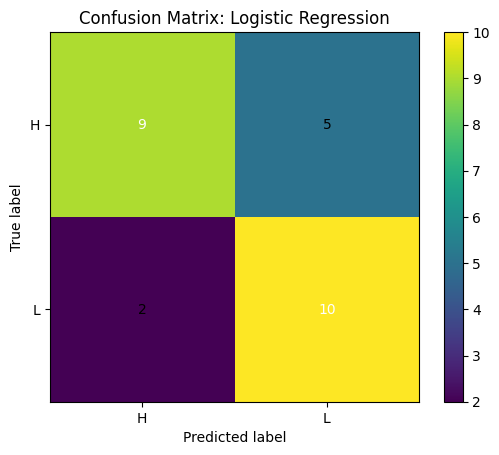

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true = y2_test, 
                      y_pred = y2_pred_logi, 
                      cmap = 'viridis',    # Choose a prefered color map
                      title = 'Confusion Matrix: Logistic Regression');

In [ ]:
tn2, fp2, fn2, tp2 = confusion_matrix(y2_test, y2_pred_logi).ravel()
print('\nConfusion Matrix:')
print('TN=',tn2, 'FP=', fp2, 'FN=', fn2, 'TP=', tp2)
print('Recall/Sensitivity= ',round(tp2/(tp2+fn2),3))
print('Specificity= ', round(tn2/(tn2+fp2),3))
print('Precision= ', round(tp2/(tp2+fp2),3))


Confusion Matrix:
TN= 9 FP= 5 FN= 2 TP= 10
Recall/Sensitivity=  0.833
Specificity=  0.643
Precision=  0.667


In [ ]:
lr_prob = logi.predict_proba(X2_test)

lr_prob 

array([[0.5855289 , 0.4144711 ],
       [0.55666454, 0.44333546],
       [0.34900659, 0.65099341],
       [0.41868831, 0.58131169],
       [0.47968832, 0.52031168],
       [0.37339902, 0.62660098],
       [0.50988876, 0.49011124],
       [0.4369826 , 0.5630174 ],
       [0.67176156, 0.32823844],
       [0.48436188, 0.51563812],
       [0.56396202, 0.43603798],
       [0.5531143 , 0.4468857 ],
       [0.49371568, 0.50628432],
       [0.49389901, 0.50610099],
       [0.41708203, 0.58291797],
       [0.45293153, 0.54706847],
       [0.55221268, 0.44778732],
       [0.52801383, 0.47198617],
       [0.29343769, 0.70656231],
       [0.44556588, 0.55443412],
       [0.44742586, 0.55257414],
       [0.51159223, 0.48840777],
       [0.45891563, 0.54108437],
       [0.44384646, 0.55615354],
       [0.55424654, 0.44575346],
       [0.51591571, 0.48408429]])

In [ ]:
from sklearn.metrics import roc_curve 
 
fpr_lr, tpr_lr, thresholds = roc_curve(y_true = y2_test, 
                                       y_score = lr_prob[:,0], 
                                       pos_label = 'H')    # col 1 refers to "LEAVE"

display(fpr_lr, tpr_lr, thresholds)     # thresholds:  f(x) values

array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
       0.25      , 0.25      , 0.5       , 0.5       , 0.75      ,
       0.75      , 0.83333333, 0.83333333, 0.91666667, 0.91666667,
       1.        ])

array([0.        , 0.07142857, 0.5       , 0.5       , 0.64285714,
       0.64285714, 0.71428571, 0.71428571, 0.78571429, 0.78571429,
       0.85714286, 0.85714286, 0.92857143, 0.92857143, 1.        ,
       1.        ])

array([1.67176156, 0.67176156, 0.55221268, 0.51591571, 0.50988876,
       0.49389901, 0.49371568, 0.45891563, 0.45293153, 0.44384646,
       0.4369826 , 0.41868831, 0.41708203, 0.37339902, 0.34900659,
       0.29343769])

In [ ]:
from sklearn.metrics import auc
 
auc_lr = auc(x = fpr_lr, y = tpr_lr)

auc_lr

0.744047619047619

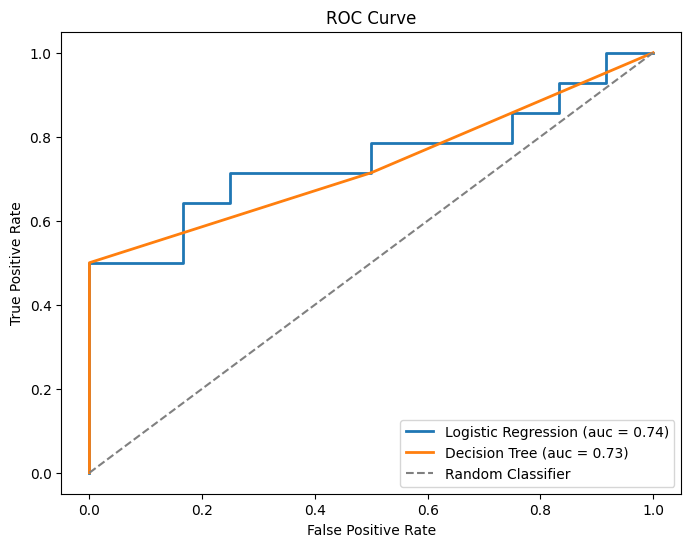

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_lr, tpr_lr, lw= 2, label='Logistic Regression (auc = {:0.2f})'.format(auc_lr))  
plt.plot(fpr_dt, tpr_dt, lw= 2, label='Decision Tree (auc = {:0.2f})'.format(auc_dt))   # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 

# SVR

In [ ]:
from sklearn.svm import SVR,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define the SVR model
svr_model = SVR(kernel='linear')

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Perform a grid search using cross-validation
grid_search = GridSearchCV(svr_model, param_grid, cv=7, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best value of C and the corresponding negative mean squared error
print("Best C:", grid_search.best_params_['C'])
print("Negative mean squared error:", grid_search.best_score_)

Best C: 1
Negative mean squared error: -0.010390748449879137


In [ ]:
svr = SVR(kernel='linear', C=1)

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(svr, X, y, cv=7, scoring='neg_mean_squared_error')

# Print the mean of the cross-validation scores
print("Mean CV MSE:", abs(np.mean(cv_scores)))


Mean CV MSE: 0.01271362417040701


In [ ]:

# Fit the SVR model on the entire dataset
svr.fit(X_train, y_train)

# Extract the coefficients from the model
SVM_weights = svr.coef_

# Normalize the weights to sum to 1
# SVM_weights = weights / np.sum(weights)



In [ ]:
# # Print the feature weights
# for i in range(len(X.columns)):
#     print(X.columns[i], ":", weights[i])

In [ ]:
SVM_weights

array([[ 0.04982734, -0.08616283,  0.25783869,  0.18227124, -0.28910501,
        -0.11218239]])

In [ ]:
# Make predictions on the test set
y_pred_SVR = svr.predict(X_test)

# Compute the mean squared error and R^2 score
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
r2_SVR = r2_score(y_test, y_pred_SVR)

# Print the results
print('Mean squared error:', mse_SVR)
print('Coefficient of determination (R^2):', r2_SVR)

Mean squared error: 0.011146695570142046
Coefficient of determination (R^2): 0.2604442416637117


## SVC 

In [ ]:
X2_train

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
46,0.250,0.250,0.250,0.000,0.000,0.250
17,0.000,0.500,0.000,0.000,0.000,0.500
7,0.500,0.000,0.500,0.000,0.000,0.000
60,0.200,0.000,0.200,0.200,0.200,0.200
45,0.000,0.250,0.250,0.250,0.250,0.000
38,0.000,0.333,0.000,0.000,0.333,0.333
37,0.333,0.000,0.000,0.000,0.333,0.333
19,0.000,0.000,0.000,0.500,0.000,0.500
13,0.000,0.500,0.000,0.000,0.500,0.000
1,0.000,1.000,0.000,0.000,0.000,0.000


In [ ]:
y2_train

46    H
17    L
7     H
60    H
45    L
38    L
37    L
19    H
13    L
1     H
31    L
4     L
27    L
51    H
22    L
29    L
9     H
16    H
43    L
36    H
57    H
61    L
50    L
14    L
53    L
2     H
34    L
52    L
30    L
10    H
48    H
15    H
23    H
39    L
3     H
24    H
8     H
Name: Total Risk.1, dtype: object

In [ ]:
# Define the decision tree model
SVC_model = SVC(kernel = 'linear')

# Define the hyperparameters to tune
param_range_SVC = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search_SVC = GridSearchCV(SVC_model, param_range_SVC, cv=7)
grid_search_SVC.fit(X2_train, y2_train)

# Print the best hyperparameters
print("Best hyperparameters for SVC:", grid_search_SVC.best_params_)
print("Best score for SVC: ", grid_search_SVC.best_score_)

Best hyperparameters for SVC: {'C': 10}
Best score for SVC:  0.7904761904761904


In [ ]:
SVC_best = grid_search_SVC.best_estimator_
SVC_best

SVC(C=10, kernel='linear')

In [ ]:
SVC = LinearSVC(C = 10)

SVC_cv = cross_val_score(estimator = SVC,X = X2, y = y2, cv=7)   # entire data

display(SVC_cv, SVC_cv.mean(), SVC_cv.std())

array([0.77777778, 0.77777778, 0.66666667, 0.66666667, 0.77777778,
       1.        , 0.66666667])

0.7619047619047619

0.10997147984564302

In [ ]:
SVC.fit(X2_train, y2_train)


LinearSVC(C=10)

In [ ]:
# Extract the coefficients from the model
SVC_weights = SVC.coef_

# Normalize the weights to sum to 1
# SVC_weights = weights / np.sum(weights)

In [ ]:
SVM_weights

array([[ 0.04982734, -0.08616283,  0.25783869,  0.18227124, -0.28910501,
        -0.11218239]])

In [ ]:
y2_pred_SVC = SVC.predict(X_test)

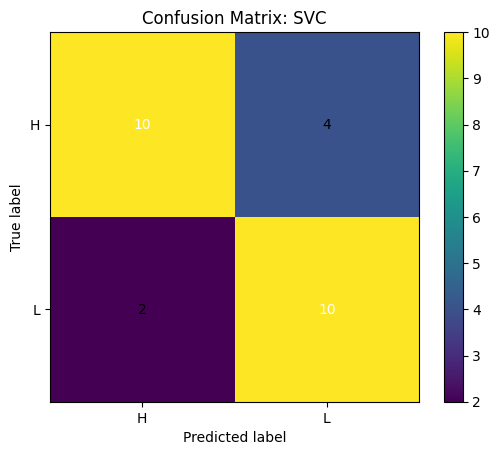

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true = y2_test, 
                      y_pred = y2_pred_SVC, 
                      cmap = 'viridis',    # Choose a prefered color map
                      title = 'Confusion Matrix: SVC'); 

In [ ]:
tn3, fp3, fn3, tp3 = confusion_matrix(y2_test, y2_pred_SVC).ravel()
print('\nConfusion Matrix:')
print('TN=',tn3, 'FP=', fp3, 'FN=', fn3, 'TP=', tp3)
print('Recall/Sensitivity= ',round(tp3/(tp3+fn3),3))
print('Specificity= ', round(tn3/(tn3+fp3),3))
print('Precision= ', round(tp3/(tp3+fp3),3))


Confusion Matrix:
TN= 10 FP= 4 FN= 2 TP= 10
Recall/Sensitivity=  0.833
Specificity=  0.714
Precision=  0.714


In [ ]:
svm = LinearSVC()
svm.fit(X2_train,y2_train) 

LinearSVC()

In [ ]:
svm_prob = SVC._predict_proba_lr(X2_test)
svm_prob 

array([[0.664979  , 0.335021  ],
       [0.62128235, 0.37871765],
       [0.20425189, 0.79574811],
       [0.35956459, 0.64043541],
       [0.46611591, 0.53388409],
       [0.26957811, 0.73042189],
       [0.57728589, 0.42271411],
       [0.42957122, 0.57042878],
       [0.7972137 , 0.2027863 ],
       [0.47757186, 0.52242814],
       [0.56892329, 0.43107671],
       [0.64671814, 0.35328186],
       [0.50053861, 0.49946139],
       [0.48724936, 0.51275064],
       [0.33669974, 0.66330026],
       [0.39923041, 0.60076959],
       [0.62210079, 0.37789921],
       [0.5600684 , 0.4399316 ],
       [0.16240263, 0.83759737],
       [0.40732624, 0.59267376],
       [0.39979684, 0.60020316],
       [0.50113016, 0.49886984],
       [0.37961018, 0.62038982],
       [0.41174801, 0.58825199],
       [0.63304381, 0.36695619],
       [0.55702854, 0.44297146]])

In [ ]:
from sklearn.metrics import roc_curve 
 
fpr_svm, tpr_svm, thresholds = roc_curve(y_true = y2_test, 
                                       y_score = svm_prob[:,0], 
                                       pos_label = 'H')    # col 1 refers to "LEAVE"

display(fpr_svm, tpr_svm, thresholds)     # thresholds:  f(x) values

array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
       0.41666667, 0.41666667, 0.66666667, 0.66666667, 0.83333333,
       0.83333333, 0.91666667, 0.91666667, 1.        ])

array([0.        , 0.07142857, 0.57142857, 0.57142857, 0.71428571,
       0.71428571, 0.78571429, 0.78571429, 0.85714286, 0.85714286,
       0.92857143, 0.92857143, 1.        , 1.        ])

array([1.7972137 , 0.7972137 , 0.56892329, 0.55702854, 0.50053861,
       0.46611591, 0.42957122, 0.39979684, 0.39923041, 0.35956459,
       0.33669974, 0.26957811, 0.20425189, 0.16240263])

In [ ]:
from sklearn.metrics import auc
 
auc_svm = auc(x = fpr_svm, y = tpr_svm)

auc_svm

0.7738095238095238

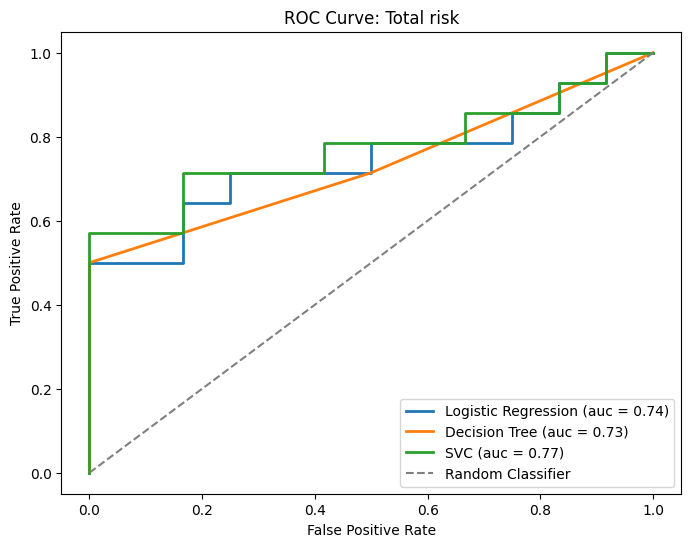

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_lr, tpr_lr, lw= 2, label='Logistic Regression (auc = {:0.2f})'.format(auc_lr))  
plt.plot(fpr_dt, tpr_dt, lw= 2, label='Decision Tree (auc = {:0.2f})'.format(auc_dt)) 
plt.plot(fpr_svm, tpr_svm, lw= 2, label='SVC (auc = {:0.2f})'.format(auc_svm))  # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve: Total risk', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 